<a href="https://colab.research.google.com/github/Neelanjansarkar/autoencoder-project/blob/main/Autoencoder_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1, 1)
x_test shape: (10000, 28, 28, 1, 1)


In [ ]:
#encoder
encoder = models.Sequential([
    layers.InputLayer(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu')
])

In [ ]:
#decoder
decoder = models.Sequential([
    layers.InputLayer(input_shape=(64,)),
    layers.Dense(7 * 7 * 64, activation='relu'),
    layers.Reshape((7, 7, 64)),
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2),
    layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same') # Output layer
])

In [ ]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 183ms/step - loss: 0.0698 - val_loss: 0.0660
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 172ms/step - loss: 0.0663 - val_loss: 0.0660
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 175ms/step - loss: 0.0663 - val_loss: 0.0658
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 172ms/step - loss: 0.0660 - val_loss: 0.0656
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - loss: 0.0659 - val_loss: 0.0661
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 174ms/step - loss: 0.0658 - val_loss: 0.0655
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - loss: 0.0658 - val_loss: 0.0656
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 175ms/step - loss: 0.0656 - val_loss: 0.0655
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 173ms/step - loss: 0.0655 - val_loss: 0.0653
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 173ms/step - loss: 0.0656 - val_loss: 0.0653


In [22]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


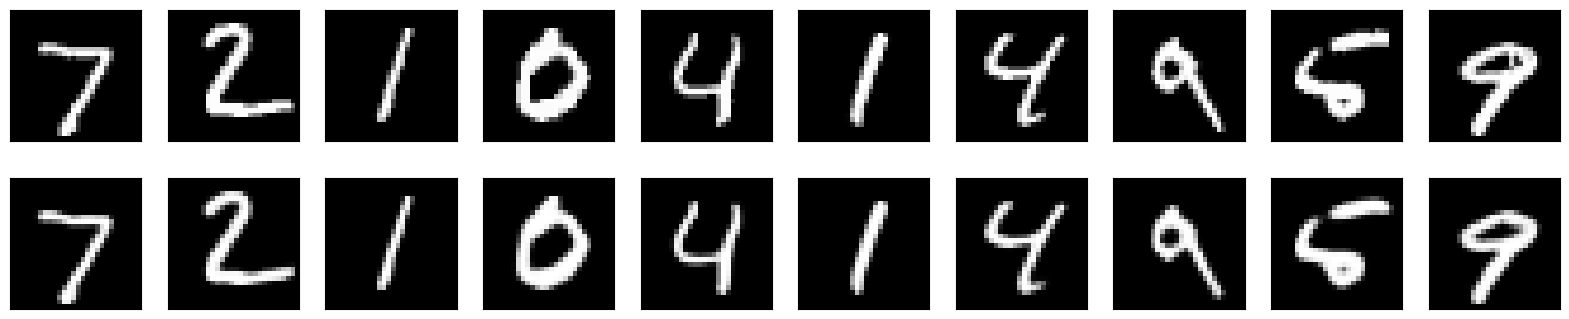

In [23]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()